In [139]:
import numpy as np
import pandas as pd 

In [140]:
from google.colab import drive
drive.mount('/content/drive')
import os 
os.chdir('/content/drive/MyDrive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
df = pd.read_csv('Mid-term.dataset.csv')
df

,X1,X2
0,12.69,1.86
1,12.85,1.80
2,13.20,1.83
3,13.61,1.80
4,13.51,1.74
5,13.75,1.83
6,13.38,1.80
7,13.55,1.80
8,13.63,1.83
9,13.25,1.77


In [142]:
a = df.corr()
a

,X1,X2
X1,1.000000,-0.279545
X2,-0.279545,1.000000


In [143]:
df.cov()

,X1,X2
X1,0.121107,-0.003313
X2,-0.003313,0.001160


In [144]:
w,v = np.linalg.eig(a.to_numpy())
print(w)
print(v)

[1.27954525 0.72045475]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [145]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#scale data
x = StandardScaler().fit_transform(df)
x.shape

(10, 2)

In [146]:
result= x@v
result

array([[-2.57821409, -0.2146983 ],
       [-0.92246113, -1.18507399],
       [-0.8293619 ,  0.22108957],
       [ 0.7053099 ,  0.44269703],
       [ 1.80419383, -1.08454769],
       [ 0.34863029,  1.39908176],
       [ 0.21269498, -0.04991788],
       [ 0.57680166,  0.3141888 ],
       [ 0.09161382,  1.14206528],
       [ 0.59079263, -0.98488456]])

In [147]:
#PCA
pca = PCA(n_components=2)

PCA_data =pca.fit_transform(x)

# to dataframe
new_data = pd.DataFrame(data= PCA_data, columns=['x1','x2'])
new_data

,x1,x2
0,2.578214,-0.214698
1,0.922461,-1.185074
2,0.829362,0.221090
3,-0.705310,0.442697
4,-1.804194,-1.084548
5,-0.348630,1.399082
6,-0.212695,-0.049918
7,-0.576802,0.314189
8,-0.091614,1.142065
9,-0.590793,-0.984885


In [148]:
new_data.corr()

,x1,x2
x1,1.000000e+00,-2.312645e-17
x2,-2.312645e-17,1.000000e+00


In [149]:
new_data.cov()

,x1,x2
x1,1.421717e+00,-1.987280e-17
x2,-1.987280e-17,8.005053e-01


Part 2: Climate model 


In [150]:
os.chdir('/content/sample_data')
df = pd.read_csv('climate-model-simulation-crashes_csv.csv')
df = df.drop(['V1','V2','Class'], axis =1 )
df.head()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
0,502,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,0.474370,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893
1,249,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,0.296618,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256
2,202,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,0.815667,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858
3,56,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,0.010015,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987
4,278,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,0.358534,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283


In [151]:
#correlation matrix
df.corr()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
V3,1.000000,0.999991,-0.000828,-0.000476,-0.008181,-0.024127,-0.004927,0.004310,-0.014108,-0.011016,0.019685,0.001707,0.002436,-0.014402,0.003979,0.005848,0.004077,0.009039
V4,0.999991,1.000000,-0.000456,-0.000614,-0.008292,-0.024379,-0.005182,0.004179,-0.013860,-0.011072,0.019706,0.001623,0.002608,-0.014716,0.004386,0.005998,0.004202,0.009141
V5,-0.000828,-0.000456,1.000000,0.009899,0.006289,-0.001587,0.019941,0.004402,-0.007695,0.007100,-0.009428,-0.024702,-0.020637,-0.004264,-0.005210,-0.000559,0.004771,-0.001334
V6,-0.000476,-0.000614,0.009899,1.000000,0.020504,0.021931,0.001805,-0.002335,-0.001731,-0.004753,0.018320,-0.010004,-0.006762,0.020442,-0.001080,-0.009262,-0.017147,0.005053
V7,-0.008181,-0.008292,0.006289,0.020504,1.000000,0.005887,-0.003047,0.012453,0.003634,0.001077,0.021354,-0.016312,0.021380,0.009894,-0.019179,-0.020752,-0.009324,0.012265
V8,-0.024127,-0.024379,-0.001587,0.021931,0.005887,1.000000,-0.016770,-0.021644,0.001244,0.015121,0.000075,0.015288,0.007036,-0.003641,-0.007897,-0.006576,0.013203,0.008411
V9,-0.004927,-0.005182,0.019941,0.001805,-0.003047,-0.016770,1.000000,-0.035498,-0.005119,0.009604,-0.006832,0.016503,0.002921,0.012447,-0.003368,0.007051,0.002443,-0.002381
V10,0.004310,0.004179,0.004402,-0.002335,0.012453,-0.021644,-0.035498,1.000000,-0.009403,0.012260,0.012005,-0.003947,-0.019307,-0.010642,0.004866,0.032398,0.000259,0.007055
V11,-0.014108,-0.013860,-0.007695,-0.001731,0.003634,0.001244,-0.005119,-0.009403,1.000000,0.008760,0.002575,0.002272,0.002633,-0.003043,0.006023,-0.008447,-0.002301,0.014281
V12,-0.011016,-0.011072,0.007100,-0.004753,0.001077,0.015121,0.009604,0.012260,0.008760,1.000000,-0.017926,0.018009,0.011925,-0.034026,0.003393,0.009925,-0.005241,-0.004465


In [152]:
#Covariance matrix
df.cov()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
V3,24345.000000,45.079799,-0.037348,-0.021449,-0.368678,-1.087380,-0.222189,0.194308,-0.635843,-0.496666,0.888029,0.076985,0.109787,-0.649307,0.179386,0.263527,0.183797,0.407599
V4,45.079799,0.083476,-0.000038,-0.000051,-0.000692,-0.002035,-0.000433,0.000349,-0.001157,-0.000924,0.001646,0.000136,0.000218,-0.001229,0.000366,0.000501,0.000351,0.000763
V5,-0.037348,-0.000038,0.083560,0.000827,0.000525,-0.000132,0.001666,0.000368,-0.000643,0.000593,-0.000788,-0.002064,-0.001723,-0.000356,-0.000435,-0.000047,0.000399,-0.000111
V6,-0.021449,-0.000051,0.000827,0.083517,0.001711,0.001831,0.000151,-0.000195,-0.000145,-0.000397,0.001531,-0.000836,-0.000564,0.001707,-0.000090,-0.000773,-0.001432,0.000422
V7,-0.368678,-0.000692,0.000525,0.001711,0.083421,0.000491,-0.000254,0.001039,0.000303,0.000090,0.001783,-0.001362,0.001783,0.000826,-0.001600,-0.001731,-0.000778,0.001024
V8,-1.087380,-0.002035,-0.000132,0.001831,0.000491,0.083436,-0.001400,-0.001806,0.000104,0.001262,0.000006,0.001276,0.000587,-0.000304,-0.000659,-0.000549,0.001102,0.000702
V9,-0.222189,-0.000433,0.001666,0.000151,-0.000254,-0.001400,0.083527,-0.002964,-0.000427,0.000802,-0.000571,0.001378,0.000244,0.001039,-0.000281,0.000589,0.000204,-0.000199
V10,0.194308,0.000349,0.000368,-0.000195,0.001039,-0.001806,-0.002964,0.083469,-0.000785,0.001024,0.001003,-0.000330,-0.001611,-0.000888,0.000406,0.002703,0.000022,0.000589
V11,-0.635843,-0.001157,-0.000643,-0.000145,0.000303,0.000104,-0.000427,-0.000785,0.083440,0.000731,0.000215,0.000190,0.000220,-0.000254,0.000503,-0.000705,-0.000192,0.001192
V12,-0.496666,-0.000924,0.000593,-0.000397,0.000090,0.001262,0.000802,0.001024,0.000731,0.083501,-0.001498,0.001504,0.000995,-0.002841,0.000283,0.000828,-0.000438,-0.000373


In [153]:
w,v = np.linalg.eig(df.corr().to_numpy())
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]
print(w)
print(v)

[2.00354872e+00 1.07723798e+00 1.07075887e+00 1.05319243e+00
 1.03691143e+00 1.02990863e+00 1.01887542e+00 1.01755037e+00
 1.01028774e+00 1.00644807e+00 9.85944823e-01 9.74084814e-01
 9.59828882e-01 9.52237039e-01 9.42879020e-01 9.35677516e-01
 9.24619633e-01 8.61919332e-06]
[[-7.05845013e-01  8.67436594e-03  1.58141882e-02  7.60367270e-03
  -9.69376364e-03 -1.33789555e-02 -6.05023955e-03 -1.49508147e-03
  -1.73963437e-03 -8.77364013e-03 -2.08530781e-02 -8.81766933e-03
   1.74814359e-02 -7.84564178e-03  9.45812980e-04 -2.29379903e-03
   1.13679726e-02  7.07101630e-01]
 [-7.05854900e-01  8.44725194e-03  1.57277902e-02  7.47904733e-03
  -9.59204117e-03 -1.35098532e-02 -5.53683470e-03 -1.60168125e-03
  -1.78001031e-03 -8.68539205e-03 -2.08854327e-02 -8.80597791e-03
   1.73861386e-02 -7.46511973e-03  6.38343337e-04 -2.45848965e-03
   1.10787407e-02 -7.07111668e-01]
 [ 1.31095188e-03 -4.62812924e-03 -2.13887704e-01  2.11506552e-01
  -5.63531975e-01 -1.95674761e-01  2.86634874e-01 -1.5817110

In [154]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#scale data
x = StandardScaler().fit_transform(df)
x.shape

(540, 18)

a) PCA 5 component

In [155]:
result = x@v[:,:5]
PCA_data= pd.DataFrame(data=result)
PCA_data.head()

,0,1,2,3,4
0,-2.100944,-1.449271,1.454719,0.071344,1.111363
1,0.229870,1.204451,0.794182,-1.286510,0.333137
2,0.702807,1.656702,1.296491,0.800824,0.140353
3,1.896391,-0.408913,-1.125390,-0.458760,1.758259
4,-0.062305,1.741315,0.155658,-1.099220,-0.134908


In [156]:
PCA_data.corr()

,0,1,2,3,4
0,1.000000e+00,1.978837e-16,-3.088114e-17,4.812177e-18,-1.996980e-17
1,1.978837e-16,1.000000e+00,3.608840e-14,2.314141e-15,-2.036744e-16
2,-3.088114e-17,3.608840e-14,1.000000e+00,4.556689e-15,8.130613e-16
3,4.812177e-18,2.314141e-15,4.556689e-15,1.000000e+00,-4.057656e-15
4,-1.996980e-17,-2.036744e-16,8.130613e-16,-4.057656e-15,1.000000e+00


In [157]:
PCA_data.cov()

,0,1,2,3,4
0,2.007266e+00,2.685957e-16,-4.284349e-17,1.400652e-17,-6.591306e-18
1,2.685957e-16,1.079237e+00,3.880302e-14,2.501400e-15,-1.911479e-16
2,-4.284349e-17,3.880302e-14,1.072745e+00,4.852849e-15,8.634610e-16
3,1.400652e-17,2.501400e-15,4.852849e-15,1.055146e+00,-4.271166e-15
4,-6.591306e-18,-1.911479e-16,8.634610e-16,-4.271166e-15,1.038835e+00


b) PCA 10 component


In [158]:
result = x@v[:,:10]
PCA_data= pd.DataFrame(data=result)
PCA_data.head()


,0,1,2,3,4,5,6,7,8,9
0,-2.100944,-1.449271,1.454719,0.071344,1.111363,-1.244097,-1.253679,1.944530,-0.306028,-0.368574
1,0.229870,1.204451,0.794182,-1.286510,0.333137,0.245830,-1.603673,0.820923,0.955211,1.071235
2,0.702807,1.656702,1.296491,0.800824,0.140353,0.464051,-0.206329,-0.430456,-0.221315,0.897239
3,1.896391,-0.408913,-1.125390,-0.458760,1.758259,-0.100114,-1.462702,0.401274,1.114906,0.231501
4,-0.062305,1.741315,0.155658,-1.099220,-0.134908,1.742907,-0.577993,1.192745,0.571849,-0.460788


In [159]:
PCA_data.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,1.978837e-16,-3.088114e-17,4.812177e-18,-1.996980e-17,4.293766e-17,2.072137e-17,-4.607746e-18,7.514452e-18,1.447841e-17
1,1.978837e-16,1.000000e+00,3.608840e-14,2.314141e-15,-2.036744e-16,2.030774e-15,2.275567e-15,-1.396215e-16,1.410586e-15,8.501363e-16
2,-3.088114e-17,3.608840e-14,1.000000e+00,4.556689e-15,8.130613e-16,-2.975485e-15,-1.054661e-15,-1.639747e-15,-8.594837e-16,-3.671848e-16
3,4.812177e-18,2.314141e-15,4.556689e-15,1.000000e+00,-4.057656e-15,-6.350594e-16,1.781992e-15,1.342156e-15,1.770914e-15,-1.590670e-15
4,-1.996980e-17,-2.036744e-16,8.130613e-16,-4.057656e-15,1.000000e+00,-8.892914e-15,-2.481865e-15,-5.232517e-15,1.143574e-15,-3.274896e-15
5,4.293766e-17,2.030774e-15,-2.975485e-15,-6.350594e-16,-8.892914e-15,1.000000e+00,-8.473734e-16,1.157170e-14,-9.253411e-16,-5.952169e-16
6,2.072137e-17,2.275567e-15,-1.054661e-15,1.781992e-15,-2.481865e-15,-8.473734e-16,1.000000e+00,-2.205852e-13,-1.447090e-14,-1.353601e-15
7,-4.607746e-18,-1.396215e-16,-1.639747e-15,1.342156e-15,-5.232517e-15,1.157170e-14,-2.205852e-13,1.000000e+00,2.226893e-14,-1.023404e-14
8,7.514452e-18,1.410586e-15,-8.594837e-16,1.770914e-15,1.143574e-15,-9.253411e-16,-1.447090e-14,2.226893e-14,1.000000e+00,-3.345394e-14
9,1.447841e-17,8.501363e-16,-3.671848e-16,-1.590670e-15,-3.274896e-15,-5.952169e-16,-1.353601e-15,-1.023404e-14,-3.345394e-14,1.000000e+00


In [160]:
PCA_data.cov()

,0,1,2,3,4,5,6,7,8,9
0,2.007266e+00,2.685957e-16,-4.284349e-17,1.400652e-17,-6.591306e-18,2.636522e-17,2.265761e-17,-4.613914e-17,2.801305e-17,0.000000e+00
1,2.685957e-16,1.079237e+00,3.880302e-14,2.501400e-15,-1.911479e-16,2.147118e-15,2.395940e-15,-1.567495e-16,1.504465e-15,8.502784e-16
2,-4.284349e-17,3.880302e-14,1.072745e+00,4.852849e-15,8.634610e-16,-3.140757e-15,-1.108163e-15,-1.733513e-15,-8.931219e-16,-3.559305e-16
3,1.400652e-17,2.501400e-15,4.852849e-15,1.055146e+00,-4.271166e-15,-6.887914e-16,1.792835e-15,1.374287e-15,1.834031e-15,-1.644531e-15
4,-6.591306e-18,-1.911479e-16,8.634610e-16,-4.271166e-15,1.038835e+00,-9.208054e-15,-2.559074e-15,-5.391688e-15,1.176445e-15,-3.348795e-15
5,2.636522e-17,2.147118e-15,-3.140757e-15,-6.887914e-16,-9.208054e-15,1.031819e+00,-8.689452e-16,1.186105e-14,-9.260784e-16,-6.154632e-16
6,2.265761e-17,2.395940e-15,-1.108163e-15,1.792835e-15,-2.559074e-15,-8.689452e-16,1.020766e+00,-2.250082e-13,-1.472498e-14,-1.382526e-15
7,-4.613914e-17,-1.567495e-16,-1.733513e-15,1.374287e-15,-5.391688e-15,1.186105e-14,-2.250082e-13,1.019438e+00,2.260983e-14,-1.036153e-14
8,2.801305e-17,1.504465e-15,-8.931219e-16,1.834031e-15,1.176445e-15,-9.260784e-16,-1.472498e-14,2.260983e-14,1.012162e+00,-3.381834e-14
9,0.000000e+00,8.502784e-16,-3.559305e-16,-1.644531e-15,-3.348795e-15,-6.154632e-16,-1.382526e-15,-1.036153e-14,-3.381834e-14,1.008315e+00


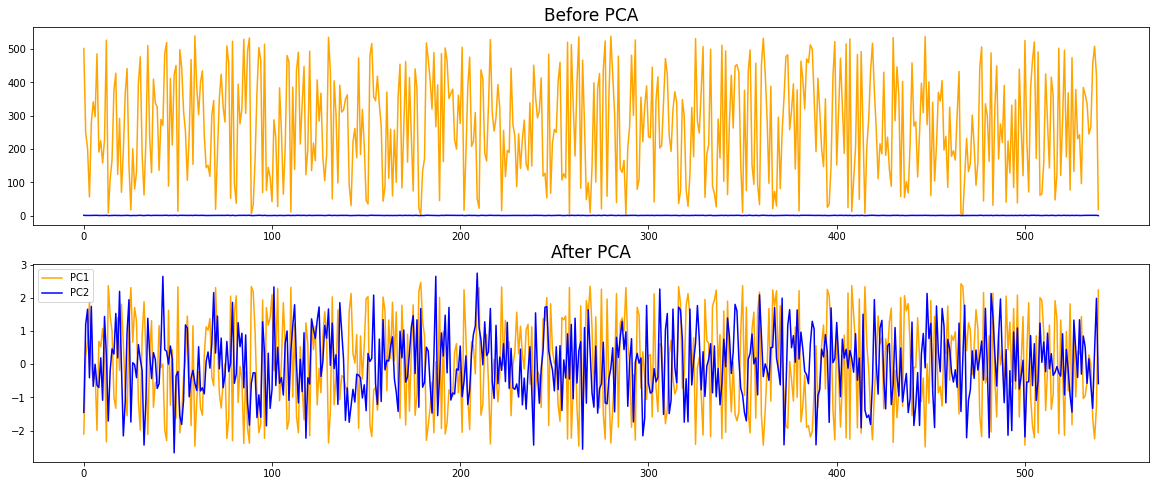

In [161]:
import matplotlib.pyplot as plt

figure, ax1 = plt.subplots(2,figsize=(20,8))
ax1[0].set_title('Before PCA', size = 17)
ax1[1].set_title('After PCA', size = 17)
ax1[0].plot(df['V3'],  color ='orange', label= 'PC1')
ax1[0].plot(df['V4'], color ='blue', label= 'PC2')
ax1[1].plot(PCA_data[0], color ='orange',label= 'PC1')
ax1[1].plot(PCA_data[1], color ='blue',label= 'PC2')
plt.legend()

Part 3: PCA with library

In [162]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#scale data
x = StandardScaler().fit_transform(df)
x.shape
#PCA
pca = PCA()

PCA_data =pca.fit_transform(x)

# to dataframe
new_data = pd.DataFrame(data= PCA_data)
new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.100944,-1.449271,-1.454719,0.071344,1.111363,1.244097,1.253679,1.944530,0.306028,0.368574,0.431292,0.176468,-0.615100,1.277083,0.296960,-0.315898,-0.528905,0.002417
1,-0.229870,1.204451,-0.794182,-1.286510,0.333137,-0.245830,1.603673,0.820923,-0.955211,-1.071235,0.625086,0.459471,1.773498,0.214427,0.094948,1.150372,-0.616937,0.005217
2,-0.702807,1.656702,-1.296491,0.800824,0.140353,-0.464051,0.206329,-0.430456,0.221315,-0.897239,-1.034537,0.383204,0.823390,0.033940,0.058353,1.161357,0.033580,-0.000531
3,-1.896391,-0.408913,1.125390,-0.458760,1.758259,0.100114,1.462702,0.401274,-1.114906,-0.231501,0.737169,-1.214965,1.180403,-0.598839,0.682928,-0.404273,1.774215,-0.002815
4,0.062305,1.741315,-0.155658,-1.099220,-0.134908,-1.742907,0.577993,1.192745,-0.571849,0.460788,-0.747494,-0.051134,-0.409168,-0.985718,-0.389238,0.188901,0.446138,0.000980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.002954,-0.633223,-1.619083,1.025604,1.694696,-0.140633,0.630060,0.739919,0.443590,0.522046,0.787586,0.279504,-1.109244,0.497900,-0.028953,0.147791,0.906213,0.005923
536,1.627189,-1.329586,-0.857266,0.540668,-0.931148,-0.021879,-0.651330,1.280806,-2.107725,-0.678133,-0.782459,-0.373818,-0.334600,-0.520077,1.165030,0.333086,-2.169899,0.001980
537,2.246769,0.410181,1.434539,0.757638,-0.540885,0.000367,-0.257206,-0.348202,0.895974,-0.685908,-1.077425,1.423489,-2.603677,1.062627,0.197639,0.337202,-0.109939,0.001940
538,1.285588,1.982489,-1.049132,1.366367,-1.963413,-0.328401,0.916660,0.635024,0.270733,-0.872954,0.133232,-0.730682,0.916641,0.369317,0.320717,0.708863,1.023951,-0.001999


In [163]:
new_data.corr().head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000e+00,-3.330716e-17,1.897787e-16,-1.222859e-16,-2.142474e-16,-1.104929e-16,-1.274940e-16,1.416882e-16,-1.517341e-16,2.606114e-17,-5.090606e-17,-9.889798e-17,-6.464071e-17,-4.450565e-17,-6.405985e-17,-1.512108e-16,-1.253756e-17,-3.478690e-17
1,-3.330716e-17,1.000000e+00,5.505588e-16,3.207060e-16,-5.776611e-16,-3.724257e-16,-2.447184e-16,-2.631404e-17,-7.883119e-19,3.742732e-16,-1.003465e-16,-8.429689e-18,2.143234e-16,-2.344100e-16,-9.064027e-17,-1.427861e-16,5.101729e-16,3.742620e-17
2,1.897787e-16,5.505588e-16,1.000000e+00,8.015251e-17,-2.216553e-16,-8.692691e-17,-2.027437e-16,4.392356e-17,1.581387e-16,-2.133989e-16,-2.177074e-16,-2.496284e-17,-1.512908e-16,-2.397502e-16,-3.762659e-16,-4.102932e-16,-2.295637e-16,-2.614530e-16
3,-1.222859e-16,3.207060e-16,8.015251e-17,1.000000e+00,5.795949e-16,2.214910e-16,-6.040535e-16,1.388231e-16,-3.011650e-16,9.595339e-17,-4.140127e-16,-6.077375e-16,-4.684797e-16,-2.683278e-16,1.813009e-16,-1.921974e-16,1.110474e-16,6.610602e-17
4,-2.142474e-16,-5.776611e-16,-2.216553e-16,5.795949e-16,1.000000e+00,-2.351602e-16,-5.547704e-16,-1.461636e-16,-4.401143e-16,3.475197e-16,1.527071e-16,-5.052941e-16,2.637902e-17,3.064278e-16,2.709006e-16,6.100102e-17,2.246189e-16,-2.159874e-16


In [164]:
new_data.cov().head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.007266e+00,-2.718914e-17,2.834261e-16,-1.787892e-16,-3.658175e-16,-1.713739e-16,-2.026826e-16,2.109218e-16,-2.257522e-16,7.250436e-17,-9.475002e-17,-1.466565e-16,-7.909567e-17,-1.252348e-16,-8.568697e-17,-2.504696e-16,-3.130870e-17,-2.317256e-19
1,-2.718914e-17,1.079237e+00,5.932175e-16,3.592262e-16,-6.162871e-16,-3.971262e-16,-2.710674e-16,-9.886958e-18,6.591306e-18,3.888870e-16,-9.969350e-17,-1.359457e-17,2.224566e-16,-2.504696e-16,-7.991958e-17,-1.516000e-16,5.174175e-16,6.436822e-20
2,2.834261e-16,5.932175e-16,1.072745e+00,8.074349e-17,-2.372870e-16,-6.591306e-17,-2.078321e-16,2.966087e-17,1.664305e-16,-2.636522e-16,-2.389348e-16,-1.941345e-17,-1.598392e-16,-2.554131e-16,-3.724088e-16,-4.074251e-16,-2.323435e-16,-7.080504e-19
3,-1.787892e-16,3.592262e-16,8.074349e-17,1.055146e+00,6.014566e-16,2.241044e-16,-6.327653e-16,1.342979e-16,-3.130870e-16,8.898262e-17,-4.284349e-16,-5.899218e-16,-4.737501e-16,-2.735392e-16,1.993870e-16,-2.043305e-16,1.285305e-16,2.252888e-19
4,-3.658175e-16,-6.162871e-16,-2.372870e-16,6.014566e-16,1.038835e+00,-2.356392e-16,-5.437827e-16,-1.516000e-16,-4.525343e-16,3.439838e-16,1.326500e-16,-5.174175e-16,4.284349e-17,3.196783e-16,2.644761e-16,4.943479e-17,2.224566e-16,-6.565558e-19


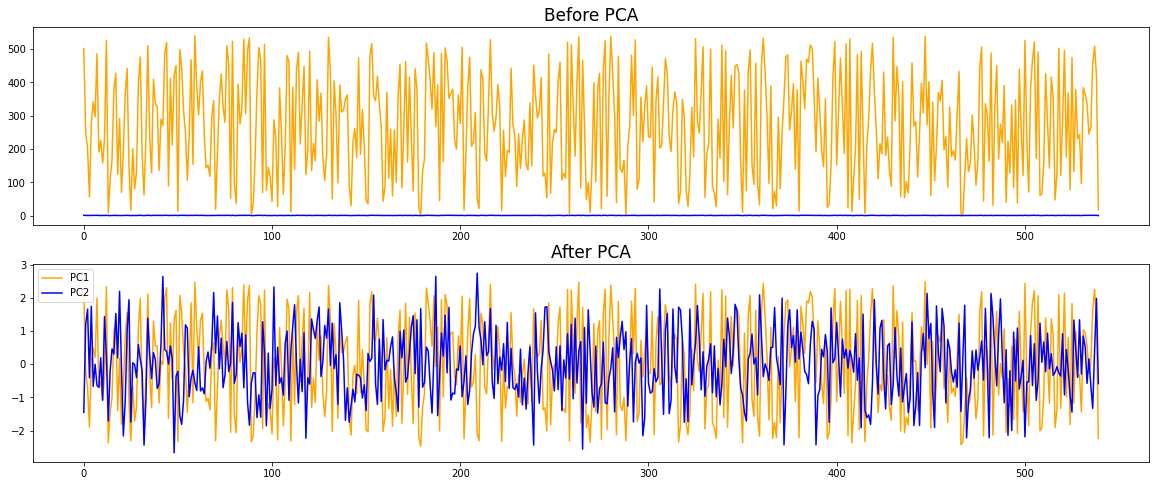

In [165]:
figure, ax1 = plt.subplots(2,figsize=(20,8))
ax1[0].set_title('Before PCA', size = 17)
ax1[1].set_title('After PCA', size = 17)
ax1[0].plot(df['V3'],  color ='orange', label= 'PC1')
ax1[0].plot(df['V4'], color ='blue', label= 'PC2')
ax1[1].plot(new_data[0], color ='orange',label= 'PC1')
ax1[1].plot(new_data[1], color ='blue',label= 'PC2')
plt.legend()

In [166]:
import scipy as sp
z_scores = sp.stats.zscore(new_data)


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_data[filtered_entries]
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.100944,-1.449271,-1.454719,0.071344,1.111363,1.244097,1.253679,1.944530,0.306028,0.368574,0.431292,0.176468,-0.615100,1.277083,0.296960,-0.315898,-0.528905,0.002417
1,-0.229870,1.204451,-0.794182,-1.286510,0.333137,-0.245830,1.603673,0.820923,-0.955211,-1.071235,0.625086,0.459471,1.773498,0.214427,0.094948,1.150372,-0.616937,0.005217
2,-0.702807,1.656702,-1.296491,0.800824,0.140353,-0.464051,0.206329,-0.430456,0.221315,-0.897239,-1.034537,0.383204,0.823390,0.033940,0.058353,1.161357,0.033580,-0.000531
3,-1.896391,-0.408913,1.125390,-0.458760,1.758259,0.100114,1.462702,0.401274,-1.114906,-0.231501,0.737169,-1.214965,1.180403,-0.598839,0.682928,-0.404273,1.774215,-0.002815
4,0.062305,1.741315,-0.155658,-1.099220,-0.134908,-1.742907,0.577993,1.192745,-0.571849,0.460788,-0.747494,-0.051134,-0.409168,-0.985718,-0.389238,0.188901,0.446138,0.000980


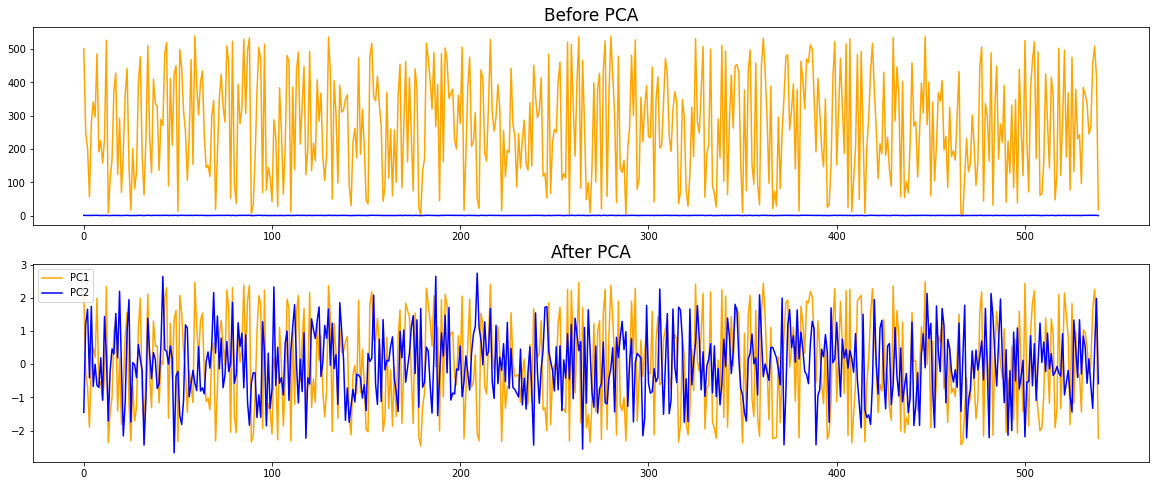

In [167]:
figure, ax1 = plt.subplots(2,figsize=(20,8))
ax1[0].set_title('Before PCA', size = 17)
ax1[1].set_title('After PCA', size = 17)
ax1[0].plot(df['V3'],  color ='orange', label= 'PC1')
ax1[0].plot(df['V4'], color ='blue', label= 'PC2')
ax1[1].plot(new_df[0], color ='orange',label= 'PC1')
ax1[1].plot(new_df[1], color ='blue',label= 'PC2')
plt.legend()